# Projet de Machine Learning 
## Gym Members Exercise Dataset
### EHRHART Elsa, SLISSE Paul, STAUB Guillaume, HOSSEINI Arman
(Notebook Python)

#### **I. Pre-proccessing des données**

On va ici sans entrer dans le détail faire la même chose que les parties I.1, I.2 et I.3 du notebook R afin de préparer nos données.

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
path="./gym_members_exercise_tracking.csv"
gym=pd.read_csv(path,sep=",",header=0)
gym.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


In [6]:
gym["Gender"]=pd.Categorical(gym["Gender"],ordered=False)
gym["Workout_Type"]=pd.Categorical(gym["Workout_Type"],ordered=False)
gym["Experience_Level"]=pd.Categorical(gym["Experience_Level"],ordered=True)
gym.dtypes

Age                                 int64
Gender                           category
Weight (kg)                       float64
Height (m)                        float64
Max_BPM                             int64
Avg_BPM                             int64
Resting_BPM                         int64
Session_Duration (hours)          float64
Calories_Burned                   float64
Workout_Type                     category
Fat_Percentage                    float64
Water_Intake (liters)             float64
Workout_Frequency (days/week)       int64
Experience_Level                 category
BMI                               float64
dtype: object

In [7]:
gym["LWeight"]=gym["Weight (kg)"].map(lambda x:np.log(x))
gym["LBMI"]=gym["BMI"].map(lambda x:np.log(x))
#gym["LWater_Intake"]=gym["Water_Intake (liters)"].map(lambda x:np.log(x))
#gym["Fat_Percentage_S"]=gym["Fat_Percentage"].map(lambda x:x**2/100)
#gym["SHeight"]=gym["Height (m)"].map(lambda x:np.sqrt(x))
del gym["Weight (kg)"]
del gym["BMI"]
#del gym["Water_Intake (liters)"]
#del gym["Fat_Percentage"]
#del gym["Height (m)"]
gym.head()

,Age,Gender,Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,LWeight,LBMI
0,56,Male,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,4.480740,3.407842
1,46,Female,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,4.316154,3.465736
2,32,Female,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,4.220977,3.207208
3,25,Male,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,3.974058,2.912894
4,38,Male,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,3.830813,2.666534


In [8]:
print(gym.isnull().sum())

Age                              0
Gender                           0
Height (m)                       0
Max_BPM                          0
Avg_BPM                          0
Resting_BPM                      0
Session_Duration (hours)         0
Calories_Burned                  0
Workout_Type                     0
Fat_Percentage                   0
Water_Intake (liters)            0
Workout_Frequency (days/week)    0
Experience_Level                 0
LWeight                          0
LBMI                             0
dtype: int64


Il n'y a aucune valeur manquante dans le jeu de données.

# **II. Prédiction des calories brûlées (Régression)**

Nous souhaitons prédire le nombre de calories brulées, nous comparons donc différentes méthodes de régression afin de s'assurer une prédiction fiable.

In [9]:
from sklearn.preprocessing import StandardScaler  
gym_dummies=pd.get_dummies(gym[["Gender","Workout_Type","Experience_Level"]])
gym_quant=gym[["Age","Height (m)","Max_BPM","Avg_BPM","Resting_BPM","Session_Duration (hours)","Fat_Percentage","Water_Intake (liters)","Workout_Frequency (days/week)","LWeight","LBMI"]]
X=pd.concat([gym_dummies,gym_quant],axis=1)
Y=gym["Calories_Burned"]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42) # Taille de l'échantillon test : 20%


# L'algorithme des réseaux de neurones ainsi que SVR nécessitent éventuellement une standardisation 
# des variables explicatives avec les commandes ci-dessous
scaler = StandardScaler()  
scaler.fit(X_train)  
Xr_train = scaler.transform(X_train)  
# Meme transformation sur le test
Xr_test = scaler.transform(X_test)

> Utiliser l'échantillon d'apprentissage pour l'entraîner est nécessaire, afin de pouvoir évaluer le modèle sur le reste des données sans avoir un biais au niveau de l'estimation de l'erreur de généralisation (l'estimateur sur l'échantillon d'apprentissage est trop optimiste).

**Régression Linéaire avec modèle Complet**

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.feature_selection import SequentialFeatureSelector

In [19]:
reglin=LinearRegression().fit(X_train,Y_train)
reglinpred=reglin.predict(X_test)
reglin_coeff = pd.DataFrame(columns=X.columns)
reglin_coeff.loc[1]=reglin.coef_
reglin_coeff

,Gender_Female,Gender_Male,Workout_Type_Cardio,Workout_Type_HIIT,Workout_Type_Strength,Workout_Type_Yoga,Experience_Level_1,Experience_Level_2,Experience_Level_3,Age,Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),LWeight,LBMI
1,-40.616945,40.616945,4.300074,-0.613634,0.854746,-4.541186,5.393996,3.487243,-8.881239,-3.303993,48.236338,0.117404,6.154324,0.608697,713.889762,-1.024192,-2.42287,4.03075,-24.770089,31.892252


In [20]:
MSE_RLt = mean_squared_error(reglinpred,Y_test)
R2_RLt = r2_score(Y_test,reglinpred)
n = X_test.shape[0]
p = X_test.shape[1]
adjusted_R2_RLt = 1 - (1 - R2_RLt) * (n - 1) / (n - p - 1)
PrevError_RLt = 1 - reglin.score(X_train, Y_train)
print("MSE=",MSE_RLt)
print("R2=",R2_RLt)
print("Adjusted R2=",adjusted_R2_RLt)
print("Erreur sur l'échantillon d'apprentissage = ", PrevError_RLt)

MSE= 1674.420188074616
R2= 0.9799290419726141
Adjusted R2= 0.9776220353027997
Erreur sur l'échantillon d'apprentissage =  0.02114616212104059


> On voit qu'on a un score du R2 vraiment proche de 1 ce qui signifie que les prédictions sont assez proche des vraies valeurs. C'est un résultat étonnamment bon pour un modèle aussi simple que le modèle linéaire. De plus, le R2 ajusté est lui aussi très proche de 1, ce qui indique qu'il y a peu de variables "superflues" pour le calcul du nombre de calories brûlées parmi toutes celles proposées dans le jeu de données.

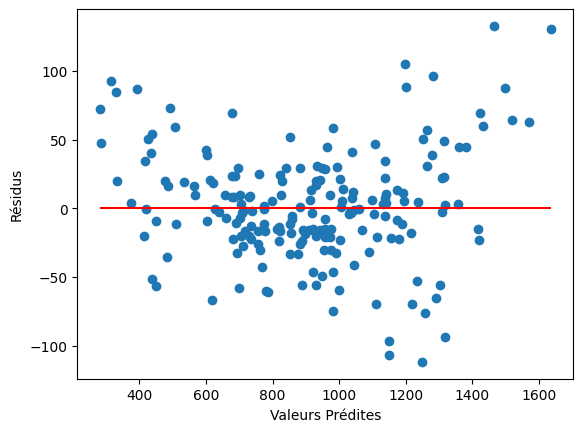

In [21]:
plt.plot(reglinpred,Y_test-reglinpred,"o")
plt.xlabel(u"Valeurs Prédites")
plt.ylabel(u"Résidus")
plt.hlines(0,min(reglinpred),max(reglinpred),"r")
plt.show()

L'hypothèse d'homoscédasticité ne semble pas tout à fait respectée : les écarts semblent plus large pour les séances éloignées de la moyenne.

In [93]:
#pip install statsmodels

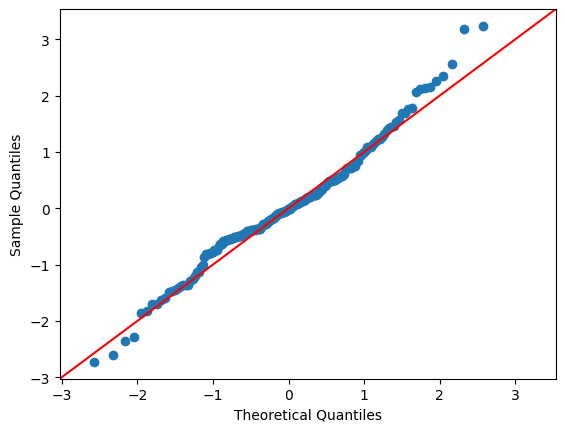

In [22]:
import statsmodels.api as sm
import pylab

residuals = Y_test - reglinpred
residuals = residuals / residuals.std()
sm.qqplot(residuals, line='45')
pylab.show()

L'hypothèse de normalité des résidus semble à peu près respectée, en tout cas il n'y a pas de tendance majeure qui s'observe.

**Régression Linéaire avec forward selection**

In [23]:
def compute_aic(n, mse, k):
    return n * math.log(mse) + 2 * k

sfs_lin = SequentialFeatureSelector(LinearRegression(), direction="forward", cv=5)
sfs_lin.fit(X_train, Y_train)
X_forward_train=sfs_lin.transform(X_train)
X_forward_test=sfs_lin.transform(X_test)
selected_features = X.columns[sfs_lin.get_support()]
print("Variables sélectionnées :", selected_features)
reglin_forward=LinearRegression().fit(X_forward_train,Y_train)
reglin_forward_pred=reglin_forward.predict(X_forward_test)

Variables sélectionnées : Index(['Gender_Female', 'Gender_Male', 'Workout_Type_Cardio', 'Age', 'Avg_BPM',
       'Resting_BPM', 'Session_Duration (hours)', 'Fat_Percentage',
       'Water_Intake (liters)', 'LWeight'],
      dtype='object')


In [24]:
reglin_forward_coeff = pd.DataFrame(columns=selected_features)
reglin_forward_coeff.loc[1]=reglin_forward.coef_
reglin_forward_coeff

,Gender_Female,Gender_Male,Workout_Type_Cardio,Age,Avg_BPM,Resting_BPM,Session_Duration (hours),Fat_Percentage,Water_Intake (liters),LWeight
1,-42.628963,42.628963,5.268184,-3.292313,6.149504,0.61687,714.138747,-0.604819,-3.326052,8.140487


In [25]:
MSE_RLfs = mean_squared_error(reglin_forward_pred,Y_test)
R2_RLfs = r2_score(Y_test, reglin_forward_pred,)
PrevError_RLfs = 1 - reglin_forward.score(X_forward_train, Y_train)
print("MSE=",MSE_RLfs)
print("R2=", R2_RLfs)
print("Erreur sur l'échantillon d'apprentissage =",PrevError_RLfs)

MSE= 1637.5141864739246
R2= 0.9803714272319186
Erreur sur l'échantillon d'apprentissage = 0.021325920448082902


> On a ici utilisé un algorithme de forward selection pour choisir les variables explicatives. On voit qu'on a supprimé quelques variables par rapport au modèle linéaire total (on n'en retient que 10 parmi toutes celles présentes initialement). Les résultats sont satisfaisants et dans le même ordre de grandeur que le modèle précédent. Les résultats sont même légèrement meilleurs ici en terme de MSE, on faisait sans doute un peu d'overfitting précédemment en retenant toutes les variables.

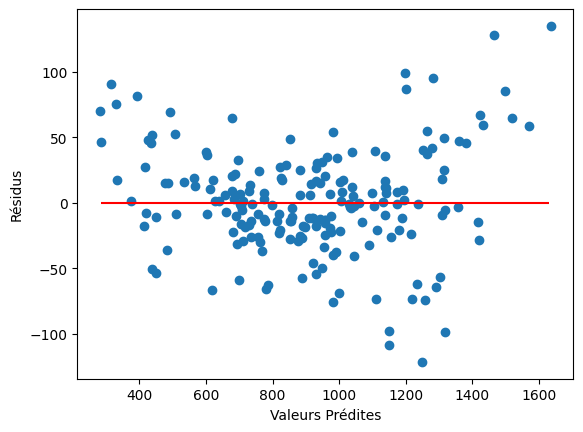

In [26]:
plt.plot(reglinpred,Y_test-reglin_forward_pred,"o")
plt.xlabel(u"Valeurs Prédites")
plt.ylabel(u"Résidus")
plt.hlines(0,min(reglin_forward_pred),max(reglin_forward_pred),"r")
plt.show()

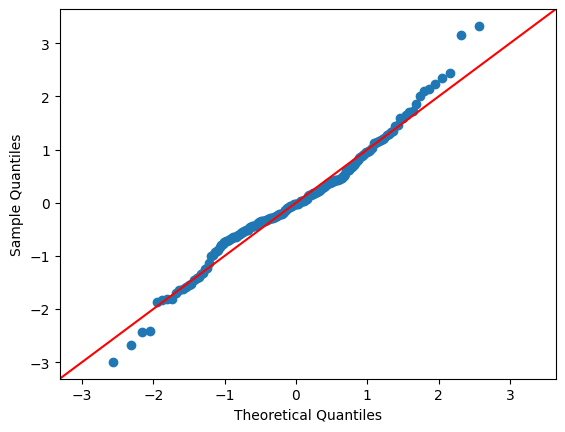

In [27]:
residuals = Y_test - reglin_forward_pred
residuals = residuals / residuals.std()
sm.qqplot(residuals, line='45')
pylab.show()

On retrouve le même problème d'hétéroscédasticité que pour le modèle complet d'auparavant. La normalité des résidus ne semble pas non plus tout à fait respectée, les queues du QQplot sont en effet un peu plus lourdes que ce que l'on devrait avoir.

**Régression Lasso**

In [28]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
model=Lasso()
param=[{"alpha":[0.05]+[0.1*i for i in range(1,9)]+[1,2]}]
regLasso = GridSearchCV(Lasso(), param,cv=5,n_jobs=-1)
regLassOpt=regLasso.fit(X_train, Y_train)
regLassOpt.best_params_["alpha"]
print("Meilleur R2 = %f, Meilleur paramètre = %s" % (regLassOpt.best_score_,regLassOpt.best_params_))

Meilleur R2 = 0.977613, Meilleur paramètre = {'alpha': 0.30000000000000004}


> On détermine la valeur optimale du paramètre de pénalisation L1 par validation croisée 5-fold, en utilisant le R2 sur l'échantillon d'apprentissage comme indicateur de qualité. On obtient ici alpha = 0.3 .

In [29]:
prev=regLassOpt.predict(X_test)
MSE_RLasso = mean_squared_error(prev,Y_test)
R2_RLasso = r2_score(Y_test,prev)
PrevError_RLasso = 1 - regLassOpt.score(X_train, Y_train)
print("MSE=",MSE_RLasso)
print("R2=",R2_RLasso)
print(f"Erreur sur l'échantillon d'apprentissage : {PrevError_RLasso}")

MSE= 1651.4150852582566
R2= 0.980204799787965
Erreur sur l'échantillon d'apprentissage : 0.02129262360098727


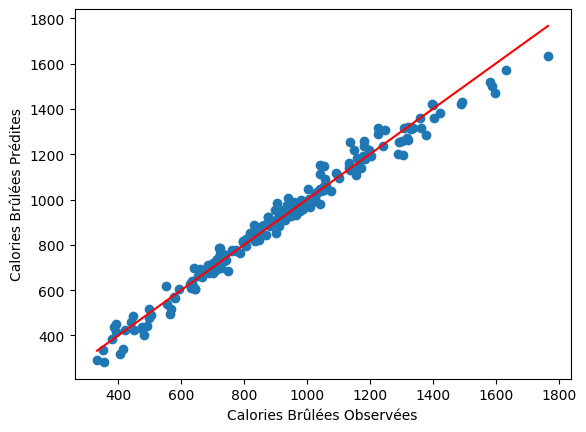

In [30]:
p=np.min(Y_test),np.max(Y_test)
plt.plot(Y_test,prev,"o")
plt.plot(p,p,"r-")
plt.xlabel("Calories Brûlées Observées")
plt.ylabel(u"Calories Brûlées Prédites")
plt.show()

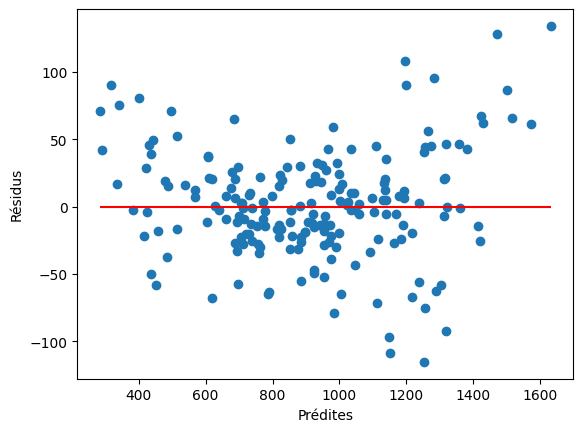

In [31]:
plt.plot(prev,Y_test-prev,"o")
plt.xlabel(u"Prédites")
plt.ylabel(u"Résidus")
plt.hlines(0,min(prev),max(prev),"r")
plt.show()

> On a utilisé ici la pénalisation Lasso pour faire la sélection de variables. On conserve avec ce modèle un peu plus de variables explicatives qu'avec la forward-selection sans pénalisation mais on obtient des résultats de performance très similaires.

## SVR

In [14]:
from sklearn.svm import SVR
param={"C":np.arange(1,2000,500), "epsilon":np.arange(0.01,0.5,0.05)}
svr = GridSearchCV(SVR(kernel = 'linear'),param,cv=5,n_jobs=-1)
svrOpt=svr.fit(Xr_train, Y_train)
# paramètre optimal
print("Meilleur score = %f, Meilleur paramètre = %s" % (1. - svrOpt.best_score_,svrOpt.best_params_))
print(svrOpt.best_params_)

C:\Users\arman\AppData\Roaming\Python\Python312\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Meilleur score = 0.022953, Meilleur paramètre = {'C': np.int64(1501), 'epsilon': np.float64(0.46)}
{'C': np.int64(1501), 'epsilon': np.float64(0.46)}


> On choisit un noyau linéaire car les régressions linéaires donnaient des résultats satisfaisants en terme de prédiction, ce qui suggère une relation de type linéaire entre les données et la variable à prédire (nombre de calories brûlées).

In [32]:
# erreur de prévision sur le test
pred_SVR = svrOpt.predict(Xr_test)
MSE_SVR = mean_squared_error(pred_SVR,Y_test)
R2_SVR = r2_score(Y_test,pred_SVR)
PrevError_SVR = 1 - svrOpt.score(Xr_train, Y_train)
print("MSE=",MSE_SVR)
print("R2=",R2_SVR)
print(f"Erreur sur l'échantillon d'apprentissage : {PrevError_SVR}")

MSE= 1730.3831140642887
R2= 0.9792582249658507
Erreur sur l'échantillon d'apprentissage : 0.02153466168567053


> La régression à vecteurs support donne des résultats similaires aux régressions de type linéaires vues précédemment, pour une complexité augmentée. Il faut en effet optimiser deux hyperparamètres. Les résultats de l'optimisation pour C indique un coefficient de pénalisation assez élevé, on pourrait donc d'avoir de l'overfitting avec SVR. En revanche l'erreur sur l'échantillon d'apprentissage n'est pas infime, ce qui est plutôt rassurant vis-à-vis de l'overfitting.

## Arbres

In [33]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

On recherche l'arbre optimal, pour cela on choisit d'optimiser sa profondeur, le nombre minimal d'échantillons pour diviser un noeud et le nombre minimal d'échantillons par feuille.

In [39]:
# Optimisation d'hyperparamètres
param=[{"max_depth":list(range(2,12)),"min_samples_split":list(range(2,10)),"min_samples_leaf":list(range(2,10))}]

tree= GridSearchCV(DecisionTreeRegressor(),param,cv=5,n_jobs=-1)
treeOpt=tree.fit(X_train, Y_train)
# paramètre optimal
print("Meilleur score = %f, Meilleur paramètre = %s" % (1. - treeOpt.best_score_,treeOpt.best_params_))

Meilleur score = 0.064218, Meilleur paramètre = {'max_depth': 10, 'min_samples_leaf': 3, 'min_samples_split': 7}


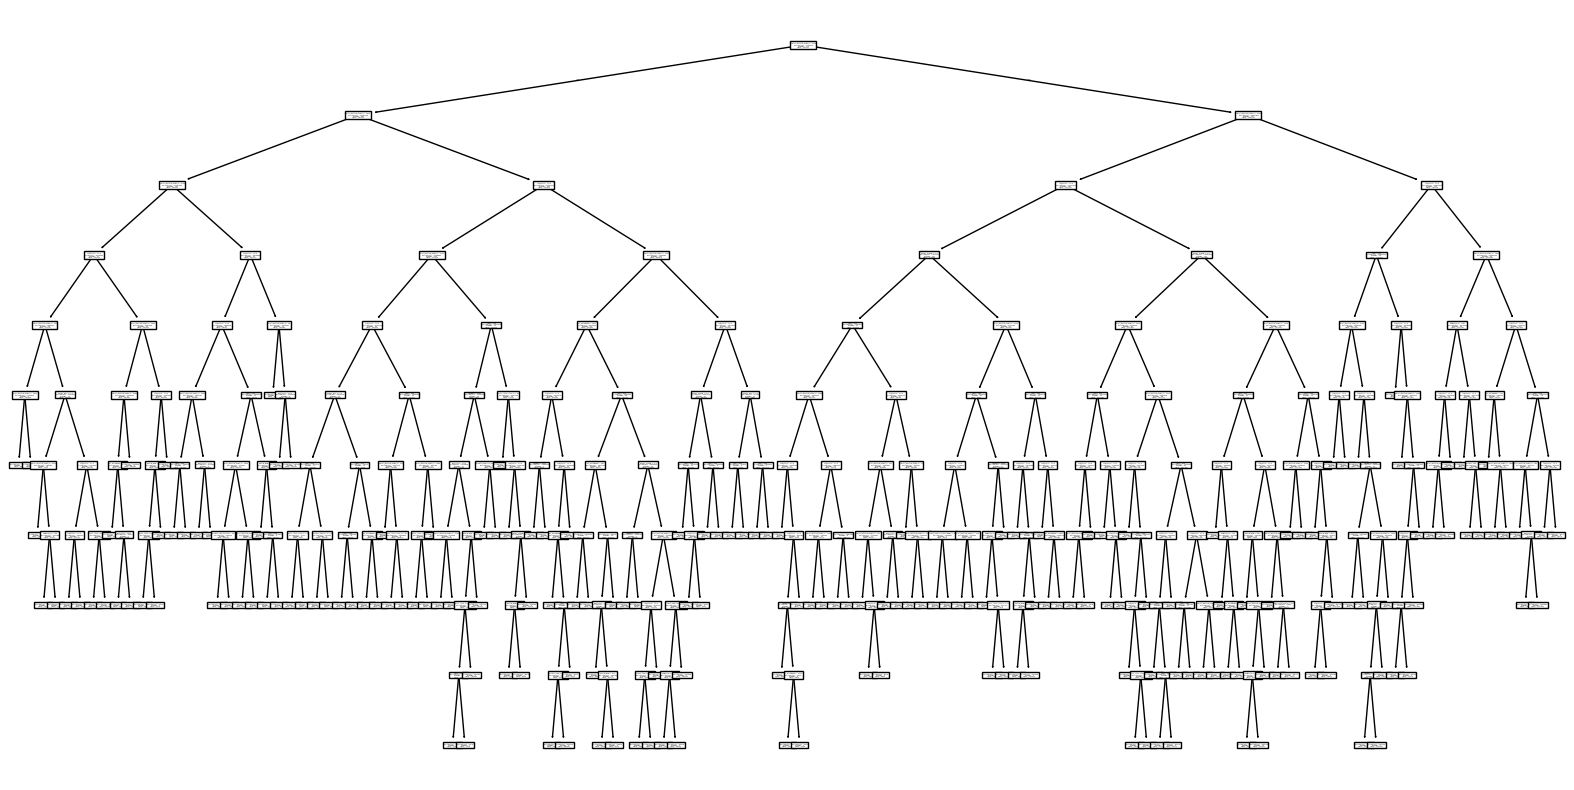

In [40]:
# prévision de l'échantillon test avec l'arbre optimal
bestTree=treeOpt.best_estimator_
Y_hat = bestTree.predict(X_test)

plt.figure(figsize=(20,10))
plot_tree(bestTree,feature_names= X.columns.tolist());
plt.show()

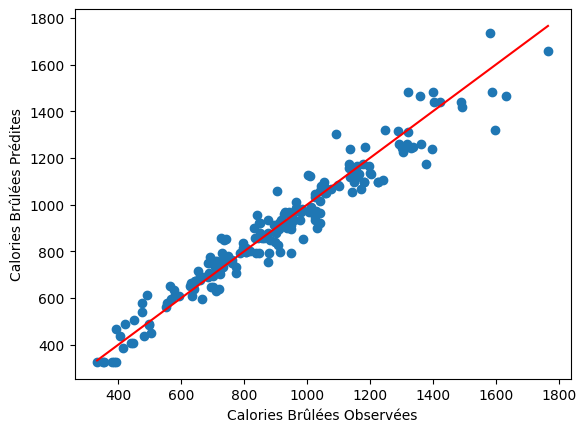

In [42]:
#visualisation des predictions

p=np.min(Y_test),np.max(Y_test)
plt.plot(Y_test,Y_hat,"o")
plt.plot(p,p,"r-")
plt.xlabel("Calories Brûlées Observées")
plt.ylabel(u"Calories Brûlées Prédites")
plt.show()

Plus le nombre de calories brûlées observées est élevé, plus les points ont tendance à s'éloigner de la droite y=x. On constate donc qu'avec un arbre on a plus de mal à obtenir une prédiction précise lorsque le nombre de calories brûlées est élevé.

In [43]:
# Estimation des erreurs
MSE_TREE = mean_squared_error(Y_hat,Y_test)
R2_TREE = r2_score(Y_test,Y_hat)
PrevError_TREE = 1-treeOpt.score(X_train,Y_train)
print(f"Erreur sur l'échantillon d'apprentissage : {PrevError_TREE}")
print("MSE=",MSE_TREE)
print("R2=",R2_TREE)

Erreur sur l'échantillon d'apprentissage : 0.008731003170347362
MSE= 4803.314482349669
R2= 0.9424235779918351


> L'erreur sur l'échantillon d'apprentissage est très faible comparée à celle sur l'échantillon de test, on fait de l'overfitting ici.

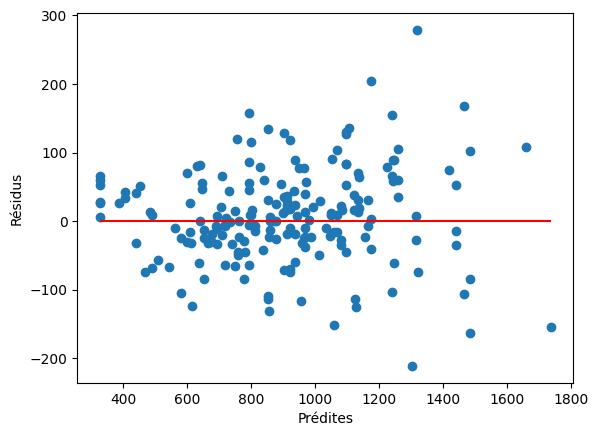

In [44]:
plt.plot(Y_hat,Y_test-Y_hat,"o")
plt.xlabel(u"Prédites")
plt.ylabel(u"Résidus")
plt.hlines(0,min(Y_hat),max(Y_hat),"r")
plt.show()

Comme évoqué précédement, on constate également avec le graphe des résidus que le modèle a plus de difficultés à donner une prédiction précise lorsque le nombre de calories brûlées est élevé. Les résidus sont centrés autour de 0, il n'y a donc pas de sur ou sous-estimation systématique des calories. 

> On constate que pour la prédiction de l'échantillon de test, la régression par arbre donne des résultats moins bons que les méthodes précédentes pour une complexité plus élevée. Intuitivement, ce n'est peut-être pas la méthode la plus adaptée à notre objectif de régression puisque le nombre de valeurs prédites possibles est fini, alors que le nombre de calories brûlées est plus ou moins unique à la personne. On aura donc nécessairement des écarts récurrents entre les valeurs prédites et les valeurs réelles.

## Random Forest

In [45]:
from sklearn.ensemble import RandomForestRegressor

In [34]:
#Recherche des hyperparamètres optimaux (attention, prend du temps à run)

param=[{"max_features":list(range(5,15,1))+["sqrt"]+["log2"],"max_depth":list(range(5,13,1)),"min_samples_split":list(range(2,7,1)),"min_samples_leaf":list(range(2,7,1))}]
rf= GridSearchCV(RandomForestRegressor(n_estimators=100,bootstrap=True, oob_score=True),
        param,cv=10,n_jobs=-1)
rfOpt=rf.fit(X_train, Y_train)
# paramètre optimal
print("Meilleur score = %f, Meilleurs paramètres = %s" % (1. - rfOpt.best_score_,rfOpt.best_params_))


Meilleur score = 0.029895, Meilleurs paramètres = {'max_depth': 10, 'max_features': 14, 'min_samples_leaf': 2, 'min_samples_split': 3}


> Remarque : il s'agit d'une méthode aléatoire donc les hyperparamètres optimaux ne seront peut-être pas exactement les mêmes à chaque exécution du bloc précédent. On part du principe que les résultats donnés seront quand même similaires.

In [46]:
# définition des paramètres (on reprend les paramètres optimaux trouvés, si la cellule précédente met trop de temps à tourner vous pouvez la sauter)
forest = RandomForestRegressor(n_estimators=500, 
   max_depth=10,
   min_samples_split=3, min_samples_leaf=2, 
   max_features=14, max_leaf_nodes=None,
   bootstrap=True, oob_score=True)
# apprentissage
rfFit = forest.fit(X_train,Y_train)
print(f"Erreur Out-of-Bag: {1-rfFit.oob_score_}")

Erreur Out-of-Bag: 0.02675860018755838


In [47]:
# erreur de prévision sur le test*
Y_hat = forest.predict(X_test)
MSE_RTREE = mean_squared_error(Y_hat,Y_test)
R2_RTREE = r2_score(Y_test,Y_hat)
PrevError_RTREE = 1-rfFit.score(X_train,Y_train)
print(f"Erreur sur l'échantillon d'apprentissage: {PrevError_RTREE}")
print("MSE=",MSE_RTREE)
print("R2=",R2_RTREE)

Erreur sur l'échantillon d'apprentissage: 0.005360000826319711
MSE= 2333.84555106942
R2= 0.9720246348965854


> On constate que la forêt aléatoire donne de meilleurs résultats que l'arbre aléatoire précédent, ce qui est rassurant. En revanche, la prédiction sur l'échantillon de test n'est pas meilleure que la régression ou la SVR, pour un temps d'optimisation des hyperparamètres beaucoup plus long. L'erreur sur l'échantillon d'apprentissage indique aussi qu'on fait de l'overfitting.

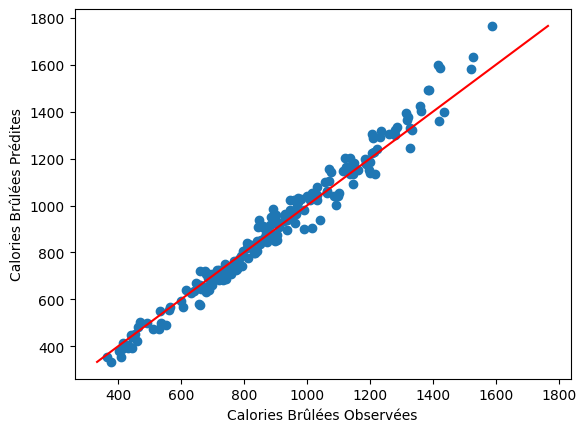

In [53]:
# prévision et visualisation
Y_hat = rfFit.predict(X_test)

#visualisation des predictions en fonction des observations
p=np.min(Y_test),np.max(Y_test)
plt.plot(Y_hat,Y_test,"o")
plt.plot(p,p,"r-")
plt.xlabel("Calories Brûlées Observées")
plt.ylabel("Calories Brûlées Prédites")
plt.show()

Session_Duration (hours) 0.6612200092064875
Avg_BPM 0.09652668786267748
Experience_Level_3 0.08783481986948213
Fat_Percentage 0.07569606499698435
Age 0.019735158263687495
Experience_Level_1 0.0101238386758574
Experience_Level_2 0.009685859641622687
Gender_Male 0.005672952444375152
Gender_Female 0.005660029326012285
LWeight 0.005399436478300909
Height (m) 0.005390989319213488
Water_Intake (liters) 0.004778110361239082
LBMI 0.0034812615813892317
Resting_BPM 0.0031378567166420223
Max_BPM 0.0026139217287682397
Workout_Frequency (days/week) 0.0012301256206936617
Workout_Type_Strength 0.0005534598872249929
Workout_Type_Cardio 0.00044221640577604514
Workout_Type_Yoga 0.0004401198496662349
Workout_Type_HIIT 0.0003770817638995294


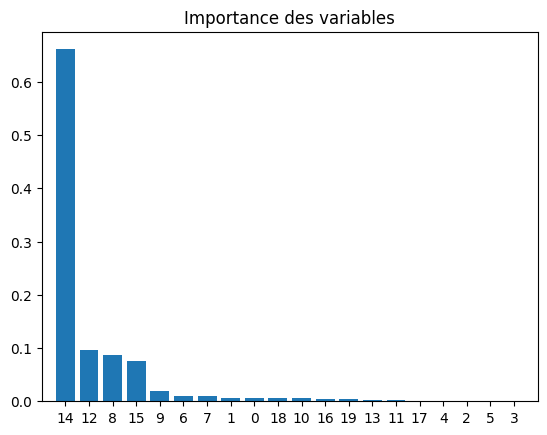

In [49]:
# Importance décroissante des variables
importances = rfFit.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(X_train.shape[1]):
    print(X.columns[indices[f]], importances[indices[f]])

plt.figure()
plt.title("Importance des variables")
plt.bar(range(X_train.shape[1]), importances[indices]);
plt.xticks(range(X_train.shape[1]), indices);
plt.xlim([-1, X_train.shape[1]]);
plt.show()

La variable la plus importante est de loin la durée de la séance, ce qui reste cohérent avec l'analyse exploratoire qui nous montrait que les calories brûlées et la durée de la séance sont deux variables très corrélées.

## Gradient Boosting

In [51]:
from sklearn.ensemble import GradientBoostingRegressor

In [78]:
# Gradient Boosting Regressor
model = GradientBoostingRegressor(random_state=42)
param_grid = {
    'n_estimators': [300, 500, 1000],
    'learning_rate': [0.02, 0.05, 0.1],
    'max_depth': [2, 3, 5],
    'subsample': [0.8, 0.5, 0.3],
}

# Grid Search with 5-fold cross-validation
grid = GridSearchCV(model, param_grid, cv=5, n_jobs=-1)
GBRopt = grid.fit(X_train, Y_train)
print("Meilleur score = %f, Meilleurs paramètres = %s" % (1. - GBRopt.best_score_,GBRopt.best_params_))

Meilleur score = 0.003034, Meilleurs paramètres = {'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 1000, 'subsample': 0.5}


In [55]:
gbr = GradientBoostingRegressor(
    n_estimators=1000,    # number of boosting stages
    learning_rate=0.05,   # shrinkage step size
    max_depth=2,         # depth of individual trees
    subsample = 0.5,
    random_state=42
)
gbr.fit(X_train, Y_train)

# Predictions
Y_hat = gbr.predict(X_test)
MSE_GBR = mean_squared_error(Y_hat,Y_test)
R2_GBR = r2_score(Y_test,Y_hat)
PrevError_GBR = 1-rfFit.score(X_train,Y_train)
print(f"Erreur sur l'échantillon d'apprentissage : {PrevError_RTREE}")
print("MSE=",MSE_RTREE)
print("R2=",R2_RTREE)

Erreur sur l'échantillon d'apprentissage : 0.005360000826319711
MSE= 2333.84555106942
R2= 0.9720246348965854


> Les résultats proposés par le Gradient Boosting sont assez bons mais on se retrouve dans le même cas que pour les forêts aléatoires : c'est une méthode considérablement plus complexe que les modèles linéaires qui ne fournit pas nécessairement de meilleurs résultats lorsqu'on compare le R2 ou la MSE. Ici encore, les hyperparamètres choisis par validation croisée aboutissent à de l'overfitting, puisque les erreurs sur l'échantillon d'apprentissage et celui de test ne sont pas du même ordre de grandeur.

## Réseau de Neurones

In [56]:
from sklearn.neural_network import MLPRegressor

On garde la couche d'activation par défaut (relu) car c'est la plus adaptée pour notre étude. On augmente le nombre maximal d'itérations car on veut que l'algorithme converge. On veut trouver le nombre de couches cachées optimal.

In [59]:
param_grid=[{"hidden_layer_sizes":list([(5,),(10,),(15,),(20,)])}]
nnet= GridSearchCV(MLPRegressor(max_iter=20000),param_grid,cv=5,n_jobs=-1) 
# entrainement
nnetOpt=nnet.fit(Xr_train, Y_train)
# paramètre optimal
print("Meilleur score = %f, Meilleur paramètre = %s" % (1. - nnetOpt.best_score_,nnetOpt.best_params_))

Meilleur score = 0.017951, Meilleur paramètre = {'hidden_layer_sizes': (10,)}


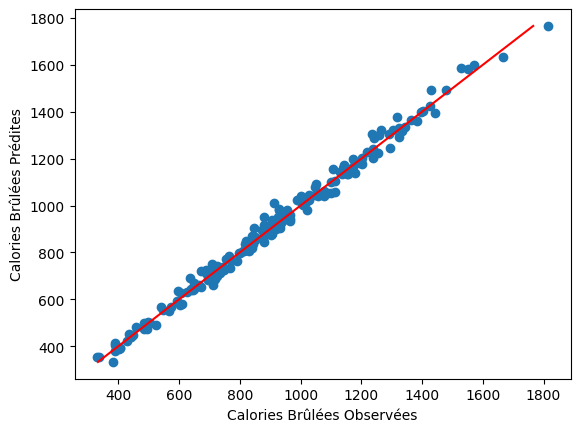

In [60]:
# prévision de l'échantillon test
Y_hat = nnetOpt.predict(Xr_test)

#visualisation des predictions en fonction des observations
p=np.min(Y_test),np.max(Y_test)
plt.plot(Y_hat,Y_test,"o")
plt.plot(p,p,"r-")
plt.xlabel("Calories Brûlées Observées")
plt.ylabel("Calories Brûlées Prédites")
plt.show()

In [61]:
# Estimation de l'erreur de prévision sur le test
MSE_NN = mean_squared_error(Y_hat,Y_test)
R2_NN = r2_score(Y_test,Y_hat)
PrevError_NN = 1-nnetOpt.score(Xr_train,Y_train)
print("Erreur de prévision = %f" % (PrevError_NN))
print("MSE=",MSE_NN)
print("R2=",R2_NN)

Erreur de prévision = 0.007930
MSE= 704.3408544290975
R2= 0.9915571994252679


> Les prédictions du réseau de neurones sont extrêmement proches de la réalité, pour un temps d'optimisation des hyperparamètres et de calcul assez limité.

Suggestions pour la suite : faire un tableau récapitulatif avec toutes les erreurs (et eventuellement les temps de calculs ?) pour chacunes des méthodes pour les comparer.
Faire un mosaic plot pour mettre par exemple tous les graphes de résidus à coté

## Tableau récapitulatif des erreurs

In [62]:
recap = pd.DataFrame({"Erreur sur l'échantillon d'apprentissage": [PrevError_RLt, PrevError_RLfs, PrevError_RLasso, PrevError_SVR, PrevError_TREE, PrevError_RTREE, PrevError_NN], 'ME': np.sqrt([MSE_RLt, MSE_RLfs, MSE_RLasso, MSE_SVR, MSE_TREE, MSE_RTREE, MSE_NN]), 'R2': [R2_RLt, R2_RLfs, R2_RLasso, R2_SVR, R2_TREE, R2_RTREE, R2_NN]}, index=['RegLinTot','RegLinFSelec', 'RegLasso', 'SVR','Tree','RandomTree', 'NeuralNetwork'])

In [63]:
recap

,Erreur sur l'échantillon d'apprentissage,ME,R2
RegLinTot,0.021146,40.919680,0.979929
RegLinFSelec,0.021326,40.466210,0.980371
RegLasso,0.021293,40.637607,0.980205
SVR,0.021535,41.597874,0.979258
Tree,0.008731,69.305948,0.942424
RandomTree,0.005360,48.309891,0.972025
NeuralNetwork,0.007930,26.539421,0.991557


En comparant les résultats sur l'échantillon de test :

- **La prédiction par réseau de neurones est de loin la plus précise** : on parvient à prédire le nombre de calories brûlées à une trentaine de kcalories près en moyenne (soit l'équivalent d'un quart de banane)!

- **Les régressions linéaires offrent des résultats très satisfaisants**, on parvient à prédire le nombre de calories brûlées à une quarantaine de kcalories près, **pour un temps de calcul et d'optimisation des paramètres minime**.
  
- **A l'inverse, les modèles non linéaires de type arbre aléatoire et régression à vecteurs supports, sont ici inutilement complexes pour notre jeu de données. Ils nécessitent un temps considérable pour optimiser les hyperparamètres et fournissent des prédictions moins bonnes que les régressions linéaires.** Pourquoi cela? En fait, notre jeu de données n'est pas suffisamment complexe pour que de telles méthodes soient intéressantes, et on se retrouve ainsi à faire de l'overfitting sur des données d'entraînement qui sont en nombre limité.  

## Et si l'on veut interpréter?

Si l'on veut, au-delà de la pure prédiction, déterminer le rôle de chaque variable dans le calcul du nombre de calories brûlées, il est difficile d'étudier le réseau de neurones qui est pourtant le plus précis en prédiction. En revanche, les régressions linéaires, et en particulier la régression LASSO, offrent une interprétation beaucoup plus simple, tout en garantissant une précision de prédiction satisfaisante. En effet, LASSO a déjà supprimé plusieurs variables qui n'étaient apparemment pas utiles au calcul.

Lasso conserve 12 variables et en supprime 8


Text(0.5, 1.0, 'Coefficients du modèle LASSO')

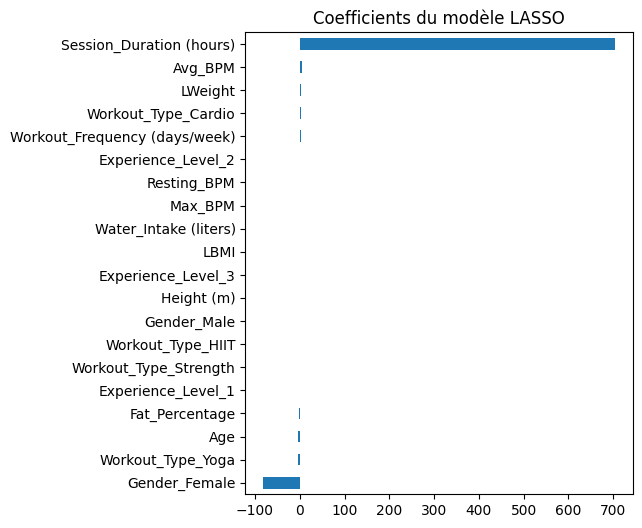

In [65]:
regLasso=Lasso(alpha=regLassOpt.best_params_['alpha'])
model_lasso=regLasso.fit(X_train,Y_train)
coef = pd.Series(model_lasso.coef_, index = X_train.columns)
print("Lasso conserve " + str(sum(coef != 0)) + " variables et en supprime " +  str(sum(coef == 0)))
imp_coef = coef.sort_values()
plt.rcParams['figure.figsize'] = (5.0, 6.0)
imp_coef.plot(kind = "barh")
plt.title(u"Coefficients du modèle LASSO")

On constate que deux variables semblent "sortir du lot" en terme d'impact sur le nombre de calories brûlées :
- la durée de la session est la variable prioritaire. Ainsi, une heure de session en plus aboutit à environ 700 kcal brûlées en plus! C'est cohérent avec ce que l'on peut observer sur le graphe de corrélations des variables (voir notebook R), on avait en effet observé une très forte corrélation positive entre la durée de la session et le nombre de calories brûlées.
- de façon surprenante, le genre intervient aussi fortement. Une femme brûlera environ 90kcal de moins par séance.

Toutes les autres variables semblent avoir des rôles assez mineurs. Même si le pourcentage de masse graisseuse et la fréquence d'entraînement étaient fortement corrélés avec le nombre de calories brûlées, c'est bel et bien la durée de la session qui est quasiment la seule à prendre en compte dans le calcul.

# III. Prédiction du niveau d'expérience (Classification)

In [66]:
gym_dummies=pd.get_dummies(gym[["Gender","Workout_Type"]])
gym_quant=gym[["Age","Height (m)","Max_BPM","Avg_BPM","Resting_BPM","Session_Duration (hours)","Fat_Percentage","Water_Intake (liters)","Workout_Frequency (days/week)","LWeight","LBMI", "Calories_Burned"]]
X=pd.concat([gym_dummies,gym_quant],axis=1)
Y=gym["Experience_Level"]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42) # Taille de l'échantillon test : 20%


# L'algorithme des réseaux de neurones ainsi que SVR nécessitent éventuellement une standardisation 
# des variables explicatives avec les commandes ci-dessous
scaler = StandardScaler()  
scaler.fit(X_train)  
Xr_train = scaler.transform(X_train)  
# Meme transformation sur le test
Xr_test = scaler.transform(X_test)

### Régression logistique sans pénalisation

In [78]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [79]:
logit = LogisticRegression(penalty="l1",solver="liblinear")
logitOpt=logit.fit(X_train, Y_train)  # GridSearchCV est lui-même un estimateur
Y_hat = logitOpt.predict(X_test)
table = pd.crosstab(Y_hat, Y_test)
print(table)
print(accuracy_score(Y_test, Y_hat))

Experience_Level   1   2   3
row_0                       
1                 68  15   0
2                 10  60   0
3                  0   0  42
0.8717948717948718


> On constate que la régression logistique a du mal à différencier niveaux d'expérience 1 et 2. C'est cohérent avec ce qu'on avait observé lors de la représentation des niveaux d'expérience dans le premier plan factoriel d'ACP : les clusters correspondant aux deux premiers niveaux d'expérience étaient indissociés, tandis que le troisième niveau d'expérience était clairement à part.

> Tout de même, la régression logistique parvient à prédire le niveau d'expérience approprié dans 87% des cas.

### Régression logistique avec pénalisation L1

In [81]:
# Optimisation du paramètre de pénalisation
# grille de valeurs
param=[{"C":[1,2,3,5,10]}]
logitP = GridSearchCV(LogisticRegression(penalty="l1",solver="liblinear"), param,cv=5,n_jobs=-1)
logitOptP=logitP.fit(X_train, Y_train)  # GridSearchCV est lui-même un estimateur
# paramètre optimal
logitOptP.best_params_["C"]
print("Meilleur score = %f, Meilleur paramètre = %s" % (logitOptP.best_score_,logitOptP.best_params_))

Meilleur score = 0.863780, Meilleur paramètre = {'C': 5}


In [82]:
Y_hat = logitOptP.predict(X_test)
table = pd.crosstab(Y_hat, Y_test)
print(table)
print(accuracy_score(Y_test, Y_hat))

Experience_Level   1   2   3
row_0                       
1                 67  14   0
2                 11  61   0
3                  0   0  42
0.8717948717948718


> On constate que la régression logistique avec pénalisation a du mal à différencier niveaux d'expérience 1 et 2. C'est cohérent avec ce qu'on avait observé lors de la représentation des niveaux d'expérience dans le premier plan factoriel d'ACP : les clusters correspondant aux deux premiers niveaux d'expérience étaient indissociés, tandis que le troisième niveau d'expérience était clairement à part.

### K-means

On va utiliser la méthode des Kmeans qui est une méthode non supervisée contrairement à toutes les autres méthodes ici présente. On va l'appliquer sur les données d'ACP car comme on a pu voir sur l'analyse préalable en R, l'ACP semble assez bien discriminer les groupes de niveau.

In [19]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [12]:
pca=PCA(6)
scaler.fit(gym_quant)  
gym_acp = scaler.transform(gym_quant)  
X_acp=pca.fit_transform(gym_acp)

In [26]:
kmeans=KMeans(n_clusters=3)
k_clusters=kmeans.fit_predict(X_acp)
table = pd.crosstab(k_clusters, gym["Experience_Level"])

In [27]:
print(table)
print(accuracy_score(gym["Experience_Level"], k_clusters))

Experience_Level    1    2    3
row_0                          
0                 251  261    0
1                   0   12  191
2                 125  133    0


NameError: name 'accuracy_score' is not defined

On voit qu'on arrive plutôt bien à récupérer le groupe de niveau expérimenté mais les deux autres groupes sont confondus comme ce qu'on a pu voir sur le graphe d'ACP (voir Notebook R)

### K plus proches voisins

In [85]:
from sklearn.neighbors import KNeighborsClassifier
# Optimisation de k
# grille de valeurs
param_grid=[{"n_neighbors":list(range(1,15))}]
knn=GridSearchCV(KNeighborsClassifier(),param_grid,cv=5,n_jobs=-1)
knnOpt=knn.fit(Xr_train, Y_train)  # GridSearchCV est lui même un estimateur
# paramètre optimal
knnOpt.best_params_["n_neighbors"]
print("Meilleur score = %f, Meilleur paramètre = %s" % (1.-knnOpt.best_score_,knnOpt.best_params_))

Meilleur score = 0.208230, Meilleur paramètre = {'n_neighbors': 8}


> Remarque : on standardise les données pour utiliser les K plus proches voisins, pour s'assurer que les distances au niveau de chaque dimension (c'est-à-dire par rapport à chaque variable) sont d'un ordre de grandeur similaire.

In [86]:
Y_hat = knnOpt.predict(Xr_test)
table = pd.crosstab(Y_hat, Y_test)
print(table)
print(accuracy_score(Y_test, Y_hat))

Experience_Level   1   2   3
row_0                       
1                 59  16   0
2                 19  59   0
3                  0   0  42
0.8205128205128205


> On obtient des résultats moins bons en utilisant la méthode non-paramétrique des K plus proches voisins pour K = 8 (paramètre optimisé par validation croisée). En effet, on prédit mal dans plus de 20% des cas. Notre jeu de données n'est peut-être pas assez conséquent pour pouvoir utiliser efficacement cette méthode.

### Machine à vecteurs de support

Etant donné qu'on n'a pas trop d'idées, à ce stade-là, sur la forme de la fonction qui, aux autres variables, associe le niveau d'expérience, on choisit le noyau par défaut 'RBF' pour la SVM.

In [97]:
from sklearn.svm import SVC
param=[{"C":[0.1, 0.15, 0.2, 0.25, 0.3, 0.5], "gamma" : ['scale', 'auto']}]
svm= GridSearchCV(SVC(),param,cv=5,n_jobs=-1)
svmOpt=svm.fit(Xr_train, Y_train)
# paramètre optimal
print("Meilleur score = %f, Meilleur paramètre = %s" % (1. - svmOpt.best_score_,svmOpt.best_params_))

Meilleur score = 0.124723, Meilleur paramètre = {'C': 0.15, 'gamma': 'scale'}


In [98]:
Y_hat = svmOpt.predict(Xr_test)
table = pd.crosstab(Y_hat, Y_test)
print(table)
print(accuracy_score(Y_test, Y_hat))

Experience_Level   1   2   3
row_0                       
1                 60   7   0
2                 18  68   0
3                  0   0  42
0.8717948717948718


> On obtient des résultats assez similaires en terme de précision que pour les régressions logistiques, si ce n'est que la SVM a davantage tendance à considérer que les débutants sont plus expérimentés qu'ils ne le sont vraiment.

### Arbre binaire de décision

In [99]:
from sklearn.tree import DecisionTreeClassifier
# Optimisation de la profondeur de l'arbre
param=[{"max_depth":list(range(2,10))}]
tree= GridSearchCV(DecisionTreeClassifier(),param,cv=5,n_jobs=-1)
treeOpt=tree.fit(X_train, Y_train)
# paramètre optimal
print("Meilleur score = %f, Meilleur paramètre = %s" % (1. - treeOpt.best_score_,treeOpt.best_params_))

Meilleur score = 0.102870, Meilleur paramètre = {'max_depth': 4}


In [101]:
Y_hat = treeOpt.predict(X_test)
table = pd.crosstab(Y_hat, Y_test)
print(table)
print(accuracy_score(Y_test, Y_hat))

Experience_Level   1   2   3
row_0                       
1                 63   0   0
2                 15  75   0
3                  0   0  42
0.9230769230769231


> L'arbre binaire de décision donne des résultats d'une précision bien meilleure que les méthodes vues jusqu'à présent (seulement 8% d'erreur). En particulier, tous les sportifs de niveau intermédiaire et avancé ont une prédiction correcte.

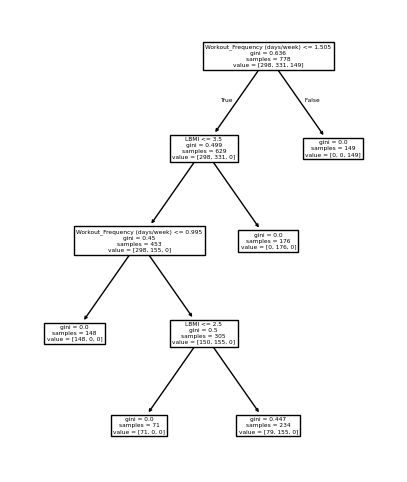

In [104]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
treeG=DecisionTreeClassifier(max_depth=treeOpt.best_params_['max_depth'])
treeG.fit(X_train,Y_train)
plot_tree(treeG,feature_names=gym.columns.tolist());
plt.show()